# **Fitting Data**

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
# load dataset
dataset_path = '../dataset/cleaned-data/cleaned_data_births_deaths.csv'
df = pd.read_csv(dataset_path)

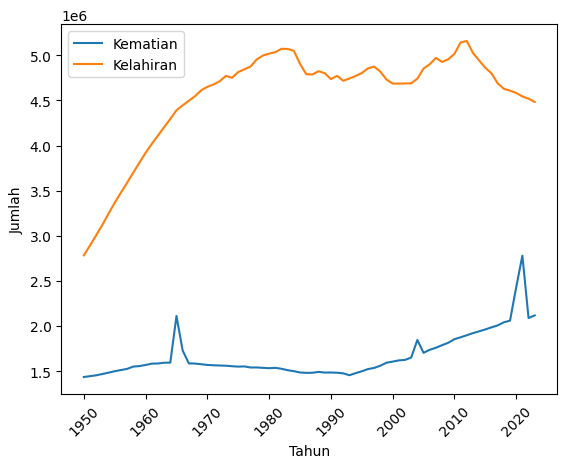

In [237]:
# Plot data untuk melihat tren kematian dan kelahiran
plt.plot(df['Year'], df['Deaths - Sex: all - Age: all - Variant: estimates'], label='Kematian')
plt.plot(df['Year'], df['Births - Sex: all - Age: all - Variant: estimates'], label='Kelahiran')
plt.xticks(rotation=45)
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

**Model Polinomial:**  
   Fungsi polinomial: $( y = ax^2 + bx + c $)

In [238]:
# Fungsi polinomial (derajat 2)
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c


In [239]:
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# Konversi kolom Year ke angka
df['Year'] = pd.to_numeric(df['Year'])

# Data untuk fitting
x_data = df['Year']
y_data_births = df['Births - Sex: all - Age: all - Variant: estimates']
y_data_deaths = df['Deaths - Sex: all - Age: all - Variant: estimates']

# Melakukan fitting data kelahiran
params_births, covariance_births = curve_fit(polynomial, x_data, y_data_births)
a_births, b_births, c_births = params_births

# Melakukan fitting data kematian
params_deaths, covariance_deaths = curve_fit(polynomial, x_data, y_data_deaths)
a_deaths, b_deaths, c_deaths = params_deaths


In [240]:
# Ambil parameter hasil fitting untuk kelahiran
print(f"Model Kelahiran: y = {a_births:.2e} * x^2 + {b_births:.2e} * x + {c_births:.2e}")

# Ambil parameter hasil fitting untuk kematian
print(f"Model Kematian: y = {a_deaths:.2e} * x^2 + {b_deaths:.2e} * x + {c_deaths:.2e}")


Model Kelahiran: y = -8.97e+02 * x^2 + 3.58e+06 * x + -3.57e+09
Model Kematian: y = 3.03e+02 * x^2 + -1.20e+06 * x + 1.18e+09


In [241]:
# Prediksi hasil fitting kelahiran dan kematian
y_fitted_births = polynomial(x_data, a_births, b_births, c_births)
y_fitted_deaths = polynomial(x_data, a_deaths, b_deaths, c_deaths)


In [242]:
# Hitung MSE untuk kelahiran dan kematian
# Menggunakan mean_squared_error dari sklearn
# Untuk mengevaluasi seberapa baik model sesuai dengan data.

mse_births = mean_squared_error(y_data_births, y_fitted_births)
mse_deaths = mean_squared_error(y_data_deaths, y_fitted_deaths)
print(f"MSE Kelahiran: {mse_births:.2f}")
print(f"MSE Kematian: {mse_deaths:.2f}")

MSE Kelahiran: 40221898466.61
MSE Kematian: 18513586800.17


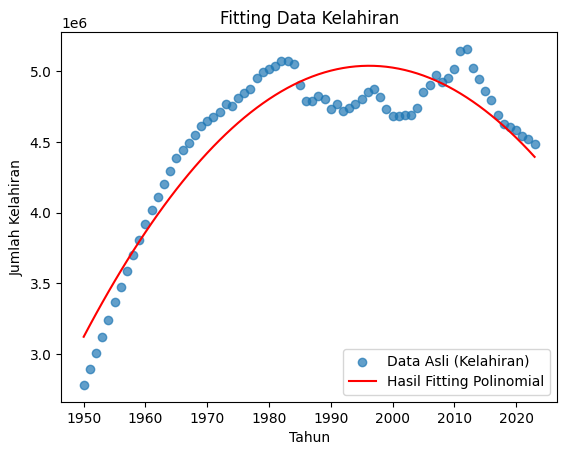

In [243]:
# Visualisasi hasil fitting untuk kelahiran
plt.scatter(x_data, y_data_births, label="Data Asli (Kelahiran)", alpha=0.7)
plt.plot(x_data, y_fitted_births, color="red", label="Hasil Fitting Polinomial")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kelahiran")
plt.legend()
plt.title("Fitting Data Kelahiran")
plt.show()

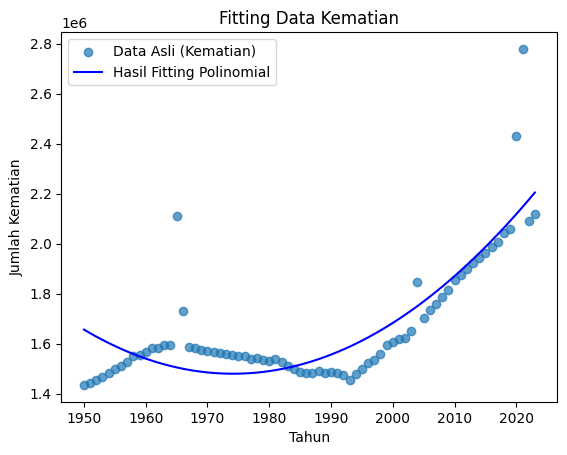

In [244]:
# Visualisasi hasil fitting untuk kematian
plt.scatter(x_data, y_data_deaths, label="Data Asli (Kematian)", alpha=0.7)
plt.plot(x_data, y_fitted_deaths, color="blue", label="Hasil Fitting Polinomial")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kematian")
plt.legend()
plt.title("Fitting Data Kematian")
plt.show()